In [2]:
%load_ext dotenv
%dotenv 

In [3]:
from pymongo import MongoClient
import os
import pandas as pd

In [4]:
from bson import json_util, ObjectId
import json

In [5]:
def mongo_to_dataframe(mongo_data):

        sanitized = json.loads(json_util.dumps(mongo_data))
        normalized = pd.json_normalize(sanitized)
        df = pd.DataFrame(normalized)

        return df

In [6]:
mongo_conn = MongoClient(os.environ["MONGO_CONN"])
db = mongo_conn.twitter
sampled_users_collection = db.sampled_users_collection

In [7]:
projection = {"_id": False, "next_token": False} # exclude these fields from the result
cursor = sampled_users_collection.find({}, projection)
df = mongo_to_dataframe(list(cursor))

In [8]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["RT_ratio"] = df.num_RT_tweets / df.num_pulled_tweets

In [9]:
df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.30,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688
1,1597654711011876868,LuciferVtuber__,2022-11-29 18:12:32+00:00,940,True,NaN,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.27,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.65,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.37,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype              
---  ------                                        --------------  -----              
 0   id                                            1500 non-null   object             
 1   username                                      1500 non-null   object             
 2   created_at                                    1500 non-null   datetime64[ns, UTC]
 3   tweet_count                                   1500 non-null   int64              
 4   error_or_no_access                            1500 non-null   bool               
 5   num_pulled_tweets                             1408 non-null   float64            
 6   num_pulled_mentions                           1227 non-null   float64            
 7   num_RT_tweets                                 1227 non-null   float64            
 8   majority_lang     

In [11]:
subjects_condition = (df["error_or_no_access"] == False) & (df["num_pulled_tweets"] > 0) & (df["majority_lang"] == "en")
subjects_df = df[subjects_condition]

In [12]:
subjects_df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.30,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.27,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.65,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.37,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305
5,1594142802547441665,YungShitBird,2022-11-20 01:37:25+00:00,1269,False,200.0,100.0,11.0,en,0.796828,...,0.30,0.09,0.52,0.12,0.71,0.81,0.81,0.34,NaN,0.055000


In [46]:
condition = (df["error_or_no_access"] == False) & (df["num_pulled_tweets"] == 0)
users_df = df[condition]
users_df.id.count()

181

In [13]:
subjects_df.id.count()

1135

# RT ratio

array([[<AxesSubplot: title={'center': 'RT_ratio'}>]], dtype=object)

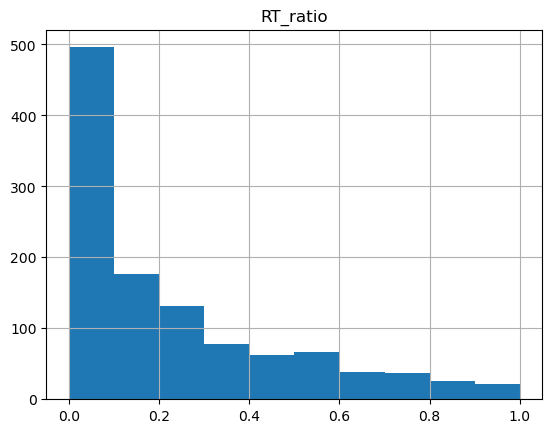

In [14]:
pd.plotting.hist_frame(subjects_df, "RT_ratio")

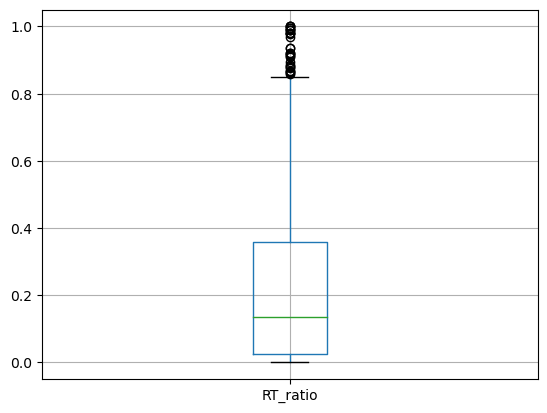

In [15]:
ax = pd.plotting.boxplot(subjects_df, "RT_ratio")

In [16]:
subjects_df.RT_ratio.describe()

count    1135.000000
mean        0.228429
std         0.249881
min         0.000000
25%         0.025000
50%         0.135000
75%         0.357143
max         1.000000
Name: RT_ratio, dtype: float64

# Bot scores

## CAP score

array([[<AxesSubplot: title={'center': 'bot_score.cap.english'}>]],
      dtype=object)

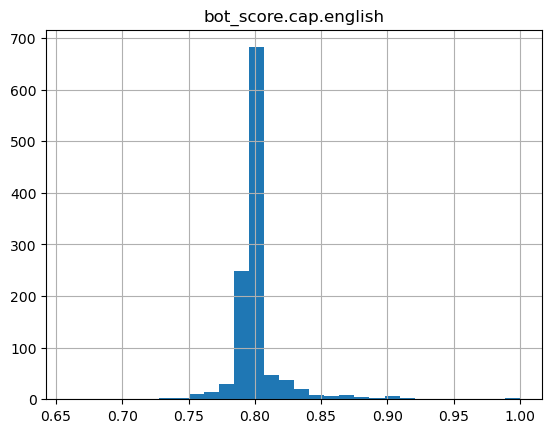

In [17]:
pd.plotting.hist_frame(subjects_df, "bot_score.cap.english", bins=30)

## Overall score

array([[<AxesSubplot: title={'center': 'bot_score.raw_scores.english.overall'}>]],
      dtype=object)

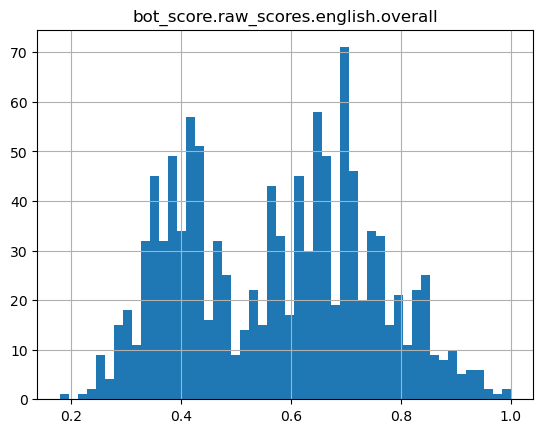

In [18]:
pd.plotting.hist_frame(subjects_df, "bot_score.raw_scores.english.overall", bins=50)

<AxesSubplot: >

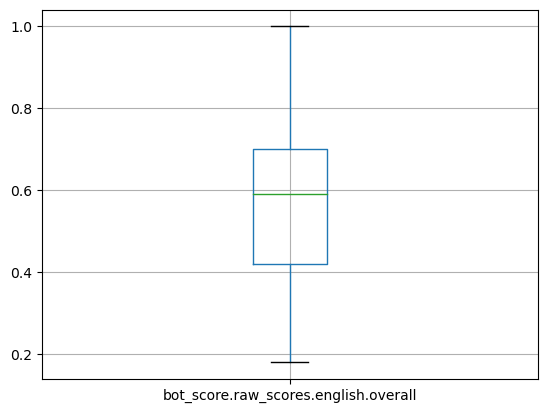

In [19]:
pd.plotting.boxplot(subjects_df, "bot_score.raw_scores.english.overall")

In [20]:
subjects_df["bot_score.raw_scores.english.overall"].describe()

count    1135.000000
mean        0.574326
std         0.171039
min         0.180000
25%         0.420000
50%         0.590000
75%         0.700000
max         1.000000
Name: bot_score.raw_scores.english.overall, dtype: float64

# Low score users

In [36]:
score_threshold = 0.5
low_score_selection = (subjects_df["bot_score.raw_scores.english.overall"] < score_threshold) 
# rt_ratio_threshold = 0.8
# low_rt_ratio_selection = (subjects_df["RT_ratio"] < rt_ratio_threshold) 

subjects_df["low_score"] = low_score_selection
# subjects_df["low_score"] = low_score_selection & low_rt_ratio_selection

/var/folders/dd/2_blbb9s3nn8bw_ty17bwmdc0002l2/T/ipykernel_5167/1178835442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subjects_df["low_score"] = low_score_selection


In [37]:
subjects_df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio,low_score
0,1386498869186502660,TerminatusX,2021-04-26 01:54:31+00:00,12432,False,199.0,0.0,107.0,en,0.797076,...,0.22,0.76,0.03,0.85,0.85,0.85,0.41,NaN,0.537688,False
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050000,True
3,2550669008,riverlevel_0885,2014-06-06 18:18:45+00:00,6988,False,200.0,1.0,0.0,en,0.874858,...,0.10,0.63,0.13,0.96,0.96,0.93,0.63,NaN,0.000000,False
4,1510071482314944512,Wabuuu2236,2022-04-02 01:49:05+00:00,250,False,197.0,85.0,4.0,en,0.816204,...,0.06,0.60,0.16,0.88,0.93,0.93,0.44,NaN,0.020305,False
5,1594142802547441665,YungShitBird,2022-11-20 01:37:25+00:00,1269,False,200.0,100.0,11.0,en,0.796828,...,0.09,0.52,0.12,0.71,0.81,0.81,0.34,NaN,0.055000,True


In [38]:
subjects_df.low_score.value_counts()

False    701
True     434
Name: low_score, dtype: int64

## Number of tweets

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

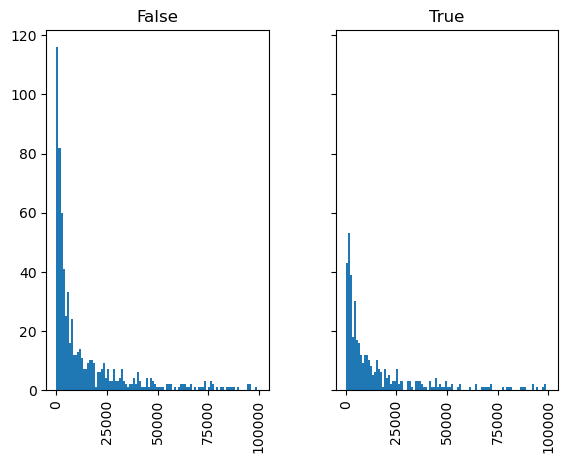

In [39]:
pd.plotting.hist_frame(subjects_df, "tweet_count", bins=100, by="low_score", sharey=True, range=(0, 100000))

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

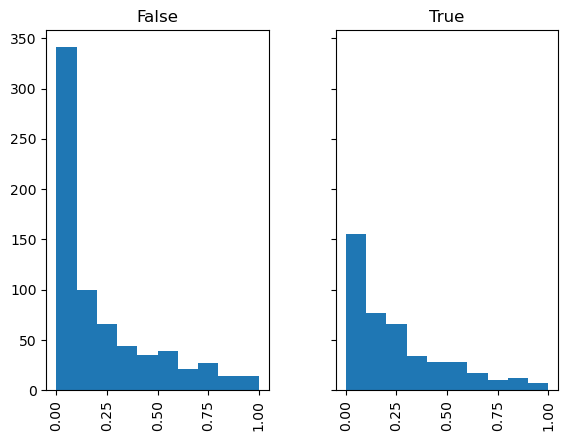

In [40]:
pd.plotting.hist_frame(subjects_df, "RT_ratio", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

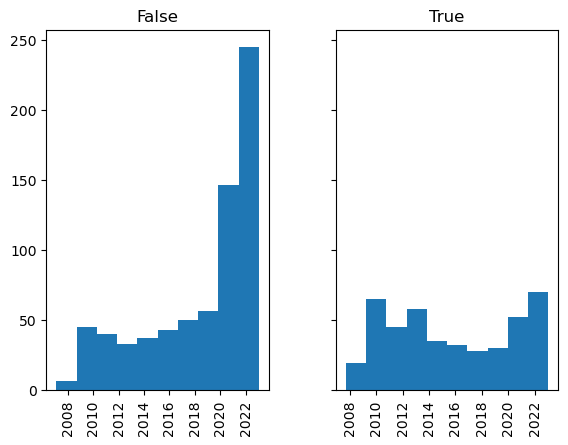

In [41]:
pd.plotting.hist_frame(subjects_df, "created_at", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

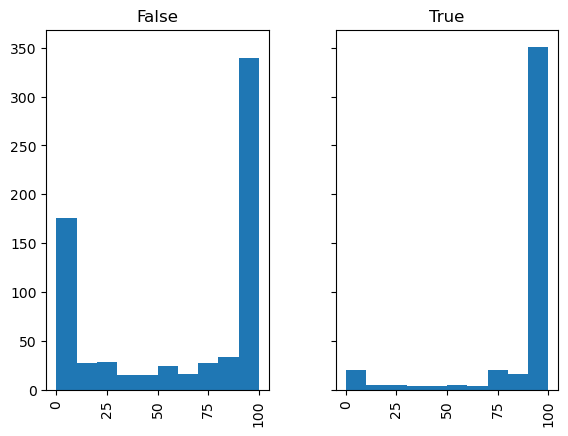

In [42]:
pd.plotting.hist_frame(subjects_df, "num_pulled_mentions", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

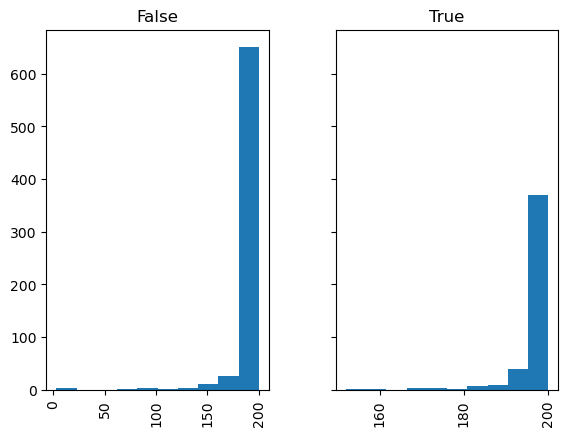

In [43]:
pd.plotting.hist_frame(subjects_df, "num_pulled_tweets", by="low_score", sharey=True)

array([<AxesSubplot: title={'center': 'False'}>,
       <AxesSubplot: title={'center': 'True'}>], dtype=object)

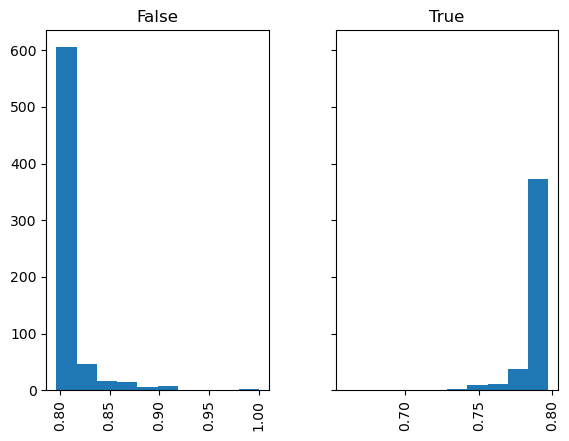

In [44]:
pd.plotting.hist_frame(subjects_df, "bot_score.cap.english", by="low_score", sharey=True, stacked=True, histtype="barstacked")

# Choosing our criteria
Out of the users who had at least 200 tweets in their timeline, we wish to keep the following:
- users who didn't get suspended
- users whose majority language is english
- users for whom we have num_pulled_tweets > 0
- users whose RT ratio is < 0.5
- users whose bot score is < 0.5

In [47]:
not_suspended = df["error_or_no_access"] == False
en_majority = df["majority_lang"] == "en"
have_tweets = df["num_pulled_tweets"] > 0
RT_acceptable = df["RT_ratio"] < 0.5
bot_score_acceptable = df["bot_score.raw_scores.english.overall"] < 0.5

In [49]:
filtered_df = df[not_suspended & en_majority & have_tweets & RT_acceptable & bot_score_acceptable]

In [50]:
filtered_df.head()

,id,username,created_at,tweet_count,error_or_no_access,num_pulled_tweets,num_pulled_mentions,num_RT_tweets,majority_lang,bot_score.cap.english,...,bot_score.raw_scores.english.spammer,bot_score.raw_scores.universal.astroturf,bot_score.raw_scores.universal.fake_follower,bot_score.raw_scores.universal.financial,bot_score.raw_scores.universal.other,bot_score.raw_scores.universal.overall,bot_score.raw_scores.universal.self_declared,bot_score.raw_scores.universal.spammer,bot_score,RT_ratio
2,1461333578764230657,KeithDa78355606,2021-11-18 14:31:52+00:00,2291,False,200.0,100.0,10.0,en,0.797061,...,0.27,0.05,0.61,0.08,0.86,0.89,0.89,0.40,NaN,0.050
5,1594142802547441665,YungShitBird,2022-11-20 01:37:25+00:00,1269,False,200.0,100.0,11.0,en,0.796828,...,0.30,0.09,0.52,0.12,0.71,0.81,0.81,0.34,NaN,0.055
6,1499514153978843150,TimothyNuell,2022-03-03 22:39:03+00:00,9333,False,200.0,11.0,11.0,en,0.794672,...,0.35,0.07,0.60,0.03,0.86,0.86,0.86,0.46,NaN,0.055
9,36945210,bkb29JD,2009-05-01 13:47:21+00:00,4484,False,200.0,100.0,2.0,en,0.782636,...,0.22,0.05,0.50,0.06,0.74,0.74,0.71,0.28,NaN,0.010
27,1599012307,Richard55139752,2013-07-16 18:23:15+00:00,3353,False,200.0,100.0,88.0,en,0.793958,...,0.32,0.16,0.55,0.10,0.87,0.87,0.74,0.32,NaN,0.440


### **There are only 360 users out of the 1500 sampled ones that fit this criteria!!!!**

In [51]:
filtered_df.id.count()

360

And the most restrictive condition is the bot score...

In [54]:
condition_names = ["not_suspended", "en_majority", "have_tweets", "RT_acceptable", "bot_score_acceptable"]
conditions = [not_suspended, en_majority, have_tweets, RT_acceptable, bot_score_acceptable]
for name, condition in zip(condition_names, conditions):
    res_df = df[condition]
    print("Number of users that fulfill %s: %d" % (name, res_df.id.count()))

Number of users that fulfill not_suspended: 1408
Number of users that fulfill en_majority: 1135
Number of users that fulfill have_tweets: 1227
Number of users that fulfill RT_acceptable: 1020
Number of users that fulfill bot_score_acceptable: 436
